# Naive Bayes

### Docente: M.Sc. Richard Fernández 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv('Social_Network_Ads.csv')

In [7]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
#data['V7'] = data.V7.astype(object)

In [10]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

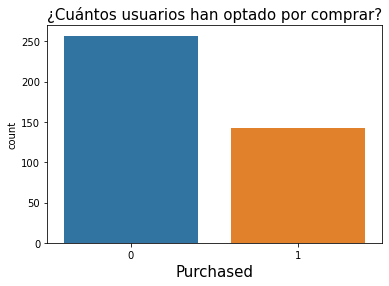

In [114]:
sns.countplot(data = data, x = 'Purchased')
plt.xlabel('Purchased', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por comprar?', fontsize = 15)
plt.show()

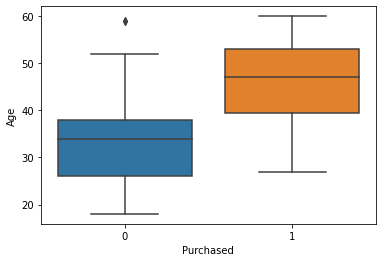

In [106]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

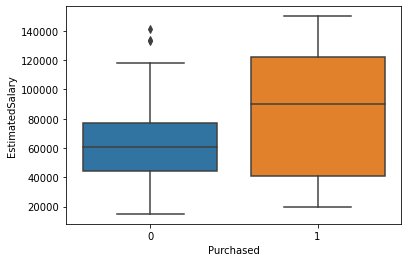

In [107]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


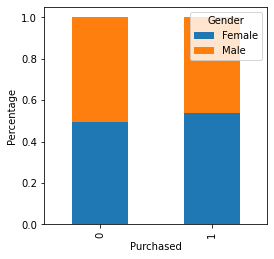

In [108]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [13]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [14]:
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [15]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
classifier = GaussianNB().fit(X_train, y_train)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [23]:
y_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [25]:
confusion_matrix(y_test, y_pred)

array([[56,  2],
       [ 4, 18]], dtype=int64)

Confusion matrix, without normalization
[[56  2]
 [ 4 18]]
Normalized confusion matrix
[[0.96551724 0.03448276]
 [0.18181818 0.81818182]]


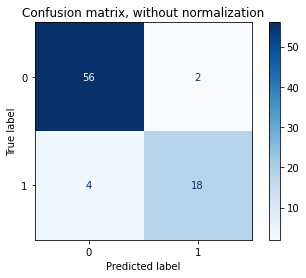

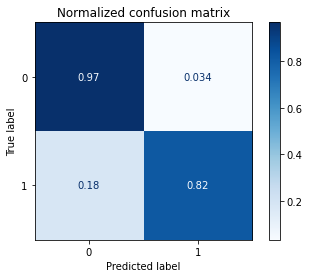

In [30]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [31]:
y_pred_prob = classifier.predict_proba(X_test)

In [32]:
y_pred_prob[0:5]

array([[0.89147043, 0.10852957],
       [0.84097849, 0.15902151],
       [0.85177346, 0.14822654],
       [0.91910807, 0.08089193],
       [0.89836193, 0.10163807]])

In [33]:
y_pred_prob[0:5,1]

array([0.10852957, 0.15902151, 0.14822654, 0.08089193, 0.10163807])

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [46]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9843260188087775

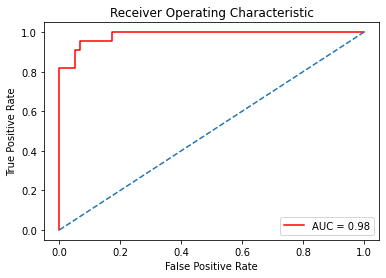

In [52]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [95]:
dataf.head(5)

,0,1,0,0,0,1
0,30,87000,0,0,0.891470,0.108530
1,38,50000,0,0,0.840978,0.159022
2,35,75000,0,0,0.851773,0.148227
3,30,79000,0,0,0.919108,0.080892
4,35,50000,0,0,0.898362,0.101638


In [101]:
dataf.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']

In [103]:
dataf.head(10)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,30,87000,0,0,0.891470,0.108530
1,38,50000,0,0,0.840978,0.159022
2,35,75000,0,0,0.851773,0.148227
3,30,79000,0,0,0.919108,0.080892
4,35,50000,0,0,0.898362,0.101638
5,27,20000,0,0,0.954340,0.045660
6,31,15000,0,0,0.904144,0.095856
7,36,144000,1,1,0.035569,0.964431
8,18,68000,0,0,0.989188,0.010812
9,47,43000,0,0,0.502816,0.497184


In [104]:
dataf.to_csv('E:/Bases/Kaggle/Social Network Ads/dataf.csv', index = False)